# Day 9 Monochrome
### CDMX underground lines based on their daily influx so far in 2021.

In [149]:
import pandas as pd
import numpy as np

In [221]:
afluencia = pd.read_csv("afluencia_metro.csv", usecols = [5,6,7], encoding = 'cp1252')
afluencia.replace(',','', regex=True, inplace=True)
afluencia['afluencia'] = pd.to_numeric(afluencia['afluencia'], errors='coerce')

In [222]:
afluencia.linea.replace(' ', '', regex=True, inplace = True)
val_lin = ["Linea1", "Linea2", "Linea3", "Linea4", "Linea5", "Linea6", "Linea7", "Linea8" 
           ,"Linea9", "LineaA", "LineaB", "Linea12"]
nom_lin = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "A", "B", "12"]
dic_lin = dict(zip(val_lin, nom_lin))
afluencia.rename(columns={"linea": "LINEA"}, inplace = True)

In [223]:
afluencia["LINEA"].replace(dic_lin, inplace = True)

In [224]:
afluencia = afluencia.groupby(["LINEA"]).median().fillna(0)

In [244]:
import geopandas as gpd
import contextily as cx

In [281]:
lineas = gpd.read_file("stcmetro_shp/STC_Metro_lineas_utm14n.shp")
lineas = lineas.merge(afluencia, on='LINEA')
lineas = lineas.sort_values("afluencia")

Text(0.5, 1.0, 'Usuarios por línea')

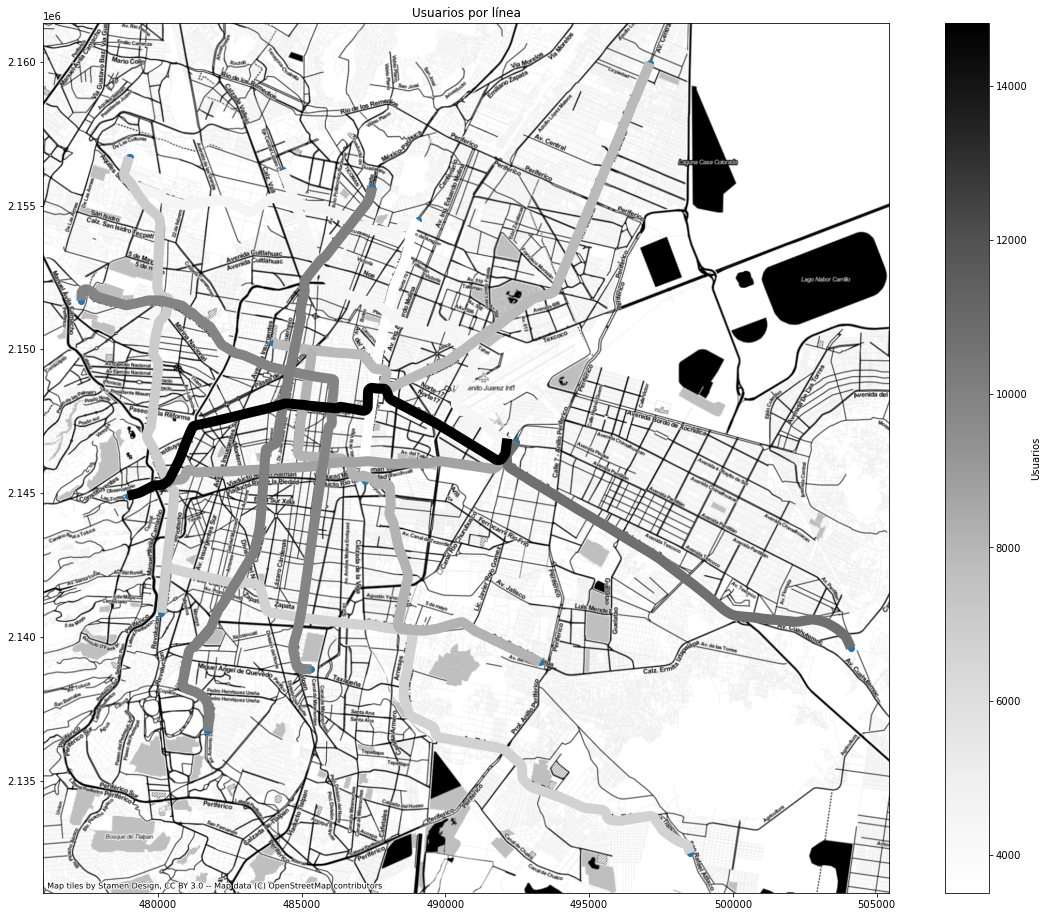

In [287]:
ax = lineas["geometry"].boundary.plot(figsize=(20,16))
lineas.plot( column="afluencia", ax=ax, cmap='Greys', 
                     legend=True, legend_kwds={"label": "Usuarios", "orientation":"vertical"}, linewidth=10.0)
cx.add_basemap(ax, crs=lineas.crs.to_string(), source=cx.providers.Stamen.Toner, zoom = 13)
ax.set_title("Usuarios por línea")

In [292]:
ax.figure.savefig('mapa.png', dpi = 300, facecolor="#6f6f6f", bbox_inches='tight')